# Detecting adapters

For datasets where the adapter is tricky in situations where non-standard adapters have been used or a barcode exists adjacent to the adapter.

# 3' adapters

This section is borrowed and copied as it is from the `cutadapt` [manual](https://cutadapt.readthedocs.io/en/v1.7.1/guide.html).


A 3’ adapter is a piece of DNA ligated to the 3’
end of the DNA fragment you are interested in. 
The sequencer starts the sequencing process at the 5’
end of the fragment and sequences into the adapter
if the read is long enough. 

The read that it outputs will then have a part of
the adapter in the end. Or, if the adapter was 
short and the read length quite long, then the adapter
will be somewhere within the read (followed by other bases).

For example, assume your fragment of interest
is MYSEQUENCE and the adapter is ADAPTER. 
Depending on the read length, 
you will get reads that look like this:

```
MYSEQUEN
MYSEQUENCEADAP
MYSEQUENCEADAPTER
MYSEQUENCEADAPTERSOMETHINGELSE
```

Use cutadapt’s -a ADAPTER option to remove this type of adapter. This will be the result:

```
MYSEQUEN
MYSEQUENCE
MYSEQUENCE
MYSEQUENCE
```
As can be seen, cutadapt correctly deals with partial adapter matches,
and also with any trailing sequences after the adapter.
Cutadapt deals with 3’ adapters by removing the adapter itself and 
any sequence that may follow.
If the sequence starts with an adapter, like this:
```
ADAPTERSOMETHING
```
Then the sequence will be empty after trimming. 
Note that, by default, empty reads are not discarded and will appear in the output.


NOTE: Our adapter in the above case is not "anchored" at the end. There is a seprate flag to handle that in `cutadapt`.

Here we perform various case studies where `cutadapt`'s auto-detection alone is not useful. 

The standard adapters are:


| Protocol |  Adapter     |
|----------|--------------|
|Illumina  | AGATCGGAAGAGC|
|Small RNA |  TGGAATTCTCGG|
|Nextera   |  CTGTCTCTTATA|

In [6]:
%pylab inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from riboraptor.kmer import fastq_kmer_histogram

def get_top_kmers(kmer_series):
    """Return all kmers with cumulative sum <=50,
    because we won't need mroe than that.
    """
    cumsum = kmer_series.cumsum()
    return kmer_series[cumsum<=70]

def get_succ_ratios(histogram):
    ratios = {}
    for key, value in histogram.items():
        ratios[key] = value.values[0]/value.values[1]
    ratios = pd.Series(ratios) 
    return ratios
    

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
len('CTGTAGGCACCATCAAT')


17

In [3]:
# Standard tru seq CTGTAGGCACCATCAAT

fastqs = {'17nt': '/staging/as/skchoudh/re-ribo-analysis/hg38/SRP098789/sratofastq/SRR5227288.fastq.gz',
         '17nt_post_trimming': '/staging/as/skchoudh/re-ribo-analysis/hg38/SRP098789/preprocessed/SRR5227288_trimmed.fq.gz',
         '13nt': '/home/cmb-06/as/skchoudh/dna/Dec_12_2017_Penalva_RPS5_Riboseq/Penalva_L_12112017/RPS5_C2_S2_L001_R1_001.fastq.gz',
         '13nt_post_trimming': '/home/cmb-panasas2/skchoudh/rna/Dec_12_2017_Penalva_RPS5_RNAseq_and_Riboseq/preprocessed/RPS5_C2_S2_L001_R1_001_trimmed.fq.gz',
         'ambiguous': '/staging/as/skchoudh/re-ribo-analysis/hg38/SRP031501/sratofastq/SRR1562541.fastq.gz',
          'truseq_kmer_detected': '/staging/as/skchoudh/re-ribo-analysis/hg38/SRP010679/preprocessed_step1/SRR403891_trimmed.fq.gz',
          'truseq_kmer_not_detected': '/staging/as/skchoudh/re-ribo-analysis/hg38/SRP010679/preprocessed_step1/SRR403893_trimmed.fq.gz'         
    
          #'erx': '/staging/as/wenzhenl/re-ribo-data/ERP005378/ERX432360/ERR466125.fastq'
         }
histograms = {k:{} for k in fastqs.keys()}

In [4]:

for key, fastq in fastqs.items():
    histograms[key] = fastq_kmer_histogram(fastq)

100%|██████████| 1000000/1000000 [00:36<00:00, 27555.73it/s]


In [15]:
histograms['raw_truseq_weird'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP010679/sratofastq/SRR403893.fastq.gz')


100%|██████████| 1000000/1000000 [00:48<00:00, 20432.67it/s]


In [26]:
histograms['SRP109126_raw'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP109126/sratofastq/SRR5680913.fastq.gz')


100%|██████████| 1000000/1000000 [00:46<00:00, 21357.65it/s]


In [61]:
histograms['drosophila_raw'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/BDGP6/SRP028243/sratofastq/SRR942868.fastq.gz')
histograms['drosophila_step1'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/BDGP6/SRP028243/preprocessed_step1/SRR942868_trimmed.fq.gz')
histograms['drosophila_step2'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/BDGP6/SRP028243/preprocessed/SRR942868_trimmed_trimmed.fq.gz')




100%|██████████| 1000000/1000000 [00:40<00:00, 24467.79it/s]


In [55]:
histograms['SRP109126_raw_5prime'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP109126/sratofastq/SRR5680913.fastq.gz', five_prime=True)



100%|██████████| 1000000/1000000 [00:50<00:00, 19941.35it/s]


In [27]:
histograms['SRP109126_pass1'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP109126/preprocessed_step1/SRR5680913_trimmed.fq.gz')
histograms['SRP109126_pass2'] = fastq_kmer_histogram('/staging/as/skchoudh/re-ribo-analysis/hg38/SRP109126/preprocessed/SRR5680913_trimmed_trimmed.fq.gz')




100%|██████████| 1000000/1000000 [00:46<00:00, 21527.87it/s]


In [60]:
histograms['SRP109126_raw'][5]

CGGAA    10.1751
TCGGA     8.7915
GGAAG     6.1694
ATCGG     5.8162
GAAGA     5.6940
ACACG     5.2163
CACGT     4.4526
CACAC     4.3914
TCTGA     4.3001
GCACA     3.8526
AAGAG     3.6186
GATCG     3.5520
GAGCA     3.5465
AGCAC     3.4561
ACGTC     3.2484
AGAGC     3.0859
CGTCT     2.2037
AGATC     1.9591
TAGAT     1.5623
CAGTC     1.4937
TCGTA     1.1196
GTAGA     1.0983
ATCGT     1.0284
ATCAC     0.9578
CGTAG     0.8934
CCAGT     0.7827
GTCTG     0.7648
AGTCA     0.7449
CGGAG     0.4919
TCCAG     0.4582
          ...   
CGCCT     0.0001
CTACA     0.0001
GTCGT     0.0001
CTCAG     0.0001
GTCGC     0.0001
GTCAT     0.0001
ACTAA     0.0001
ACTAC     0.0001
GTAAA     0.0001
ACTTA     0.0001
GGGAT     0.0001
ACTTT     0.0001
GGCAT     0.0001
GCTAA     0.0001
GCCTA     0.0001
GCCAT     0.0001
GCAGT     0.0001
GATTT     0.0001
GATTC     0.0001
GAGCT     0.0001
GACTA     0.0001
CTTAT     0.0001
AGCGG     0.0001
CTTAG     0.0001
CTGTC     0.0001
CTGGA     0.0001
CTCTT     0.0001
CTCCG     0.00

In [62]:
ratios = {}
for key, histogram in histograms.items():
    ratios[key] = get_succ_ratios(histogram)

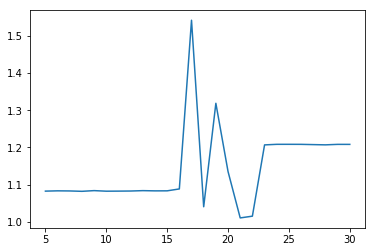

In [63]:

plt.plot(ratios['drosophila_raw'].index, ratios['drosophila_raw'].values)

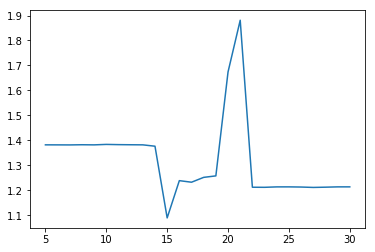

In [66]:
plt.plot(ratios['drosophila_step1'].index, ratios['drosophila_step1'].values)

In [68]:
len('AGATCGGAAGAGCACACGTCT')

21

In [69]:
a = ['a', 'b', 'c', 'd']

In [72]:
a.index('d')

3

In [67]:
histograms['drosophila_step1'][17]

CTGTAGGCACCATCAAT    12.0834
AGGCACCATCAATTCGT     9.8070
GTAGGCACCATCAATTC     7.8372
TGTAGGCACCATCAATT     7.5969
TAGGCACCATCAATTCG     5.8862
GCAAGATCGCTGTAGGC     5.1763
AAGATCGCTGTAGGCAC     4.2697
ATTCTGTAGGCACCATC     4.0792
ATCTGTAGGCACCATCA     3.2683
AACTGTAGGCACCATCA     2.1641
CATGCACTGTAGGCACC     1.8706
AGATCGCTGTAGGCACC     1.6802
GAACTGTAGGCACCATC     1.1194
CGACTGTAGGCACCATC     0.9978
GCACCATCAATTCGTAT     0.8883
ATGCTGTAGGCACCATC     0.8673
ATGCCTGTAGGCACCAT     0.8513
GACTGTAGGCACCATCA     0.8203
AGCTGTAGGCACCATCA     0.7962
CGCTGTAGGCACCATCA     0.7961
CCGCTGTAGGCACCATC     0.7477
TCGCTGTAGGCACCATC     0.7153
GTCCTGTAGGCACCATC     0.5360
GAGCTGTAGGCACCATC     0.5090
CACTGTAGGCACCATCA     0.5041
GGCTGTAGGCACCATCA     0.4849
CAACCTGTAGGCACCAT     0.4565
CCACTGTAGGCACCATC     0.4252
AATGCTGTAGGCACCAT     0.4233
TGCCTGTAGGCACCATC     0.4134
                      ...   
CTGGACCACCTGTAGGC     0.0001
TCCTTACCTGTAGGAAC     0.0001
CTGGACTCACTGTAGGC     0.0001
CTGGACTGGCGCAC

In [65]:
histograms['drosophila_raw'][17]

CTGTAGGCACCATCAAT    12.1394
GTAGGCACCATCAATTC     7.8721
TGTAGGCACCATCAATT     7.6030
TAGGCACCATCAATTCG     5.9420
CAAGATCGCTGTAGGCA     5.2049
GGCACCATCAATTCGTA     5.1549
AGGCACCATCAATTCGT     4.7440
AAGATCGCTGTAGGCAC     4.3080
TTCTGTAGGCACCATCA     4.1431
TCTGTAGGCACCATCAA     3.7340
ACTGTAGGCACCATCAA     3.6342
GCTGTAGGCACCATCAA     2.4426
CGCTGTAGGCACCATCA     1.4314
CCTGTAGGCACCATCAA     1.4047
ATGCACTGTAGGCACCA     1.3609
AACTGTAGGCACCATCA     1.1772
GATCGCTGTAGGCACCA     1.1521
GCACCATCAATTCGTAT     0.8964
ATGCCTGTAGGCACCAT     0.8528
ATGCTGTAGGCACCATC     0.7670
CGACTGTAGGCACCATC     0.6239
TCCTGTAGGCACCATCA     0.6126
AGATCGCTGTAGGCACC     0.5469
CATGCACTGTAGGCACC     0.5178
GACTGTAGGCACCATCA     0.4604
CAACCTGTAGGCACCAT     0.4588
GGCTGTAGGCACCATCA     0.4296
GCCTGTAGGCACCATCA     0.4262
AATGCTGTAGGCACCAT     0.4255
CACTGTAGGCACCATCA     0.4209
                      ...   
GCTTGAAAAAACAATAT     0.0001
GCTTGAAAAAACAAAAC     0.0001
GCTTGAAAAAAATTTGA     0.0001
GCTTGAAAAAAATT

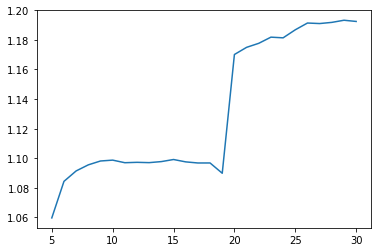

In [59]:
plt.plot(ratios['SRP109126_raw_5prime'].index, ratios['SRP109126_raw_5prime'].values)

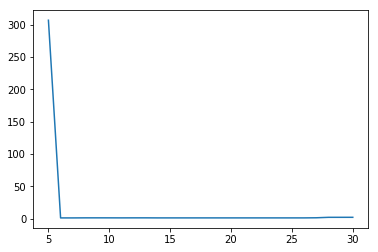

In [53]:
plt.plot(ratios['SRP109126_pass1'].index, ratios['SRP109126_pass1'].values)

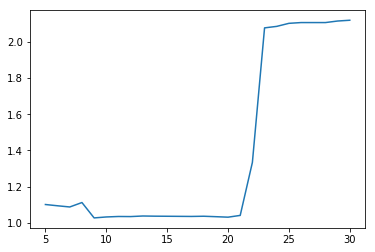

In [54]:
plt.plot(ratios['SRP109126_pass2'].index, ratios['SRP109126_pass2'].values)

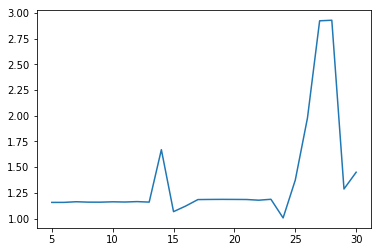

In [37]:
plt.plot(ratios['SRP109126_raw'].index, ratios['SRP109126_raw'].values)

In [50]:
len('TCGGAAGAGCACACGTCTGAACTCCAGTC')

29

In [ ]:
TCGGAAGAGCACACGTCTGAACTCCAGTC
              ATCGTAGATCGGAA

In [ ]:
ATCGTAGATCGGAAGAGCACACGT
    TAGATCGGAAGAGCACACGTCTGA

In [52]:
histograms['SRP109126_raw'][24]

ATCGTAGATCGGAAGAGCACACGT    3.9487
TAGATCGGAAGAGCACACGTCTGA    3.9223
TCGTAGATCGGAAGAGCACACGTC    2.8722
CGTAGATCGGAAGAGCACACGTCT    2.0135
AGAGCACACGTCTGAACTCCAGTC    1.3409
CATCGTAGATCGGAAGAGCACACG    1.2525
GATCGTAGATCGGAAGAGCACACG    1.1869
AATCGTAGATCGGAAGAGCACACG    1.1431
TATCGTAGATCGGAAGAGCACACG    1.1405
ACGTCTGAACTCCAGTCACATCAC    0.9230
GAGCACACGTCTGAACTCCAGTCA    0.7197
AAGAGCACACGTCTGAACTCCAGT    0.6976
GTAGATCGGAAGAGCACACGTCTG    0.6842
GAAGAGCACACGTCTGAACTCCAG    0.4142
CACGTCTGAACTCCAGTCACATCA    0.3969
GTATCGTAGATCGGAAGAGCACAC    0.3799
GGATCGTAGATCGGAAGAGCACAC    0.3693
AGATCGGAAGAGCACACGTCTGAA    0.3444
GCATCGTAGATCGGAAGAGCACAC    0.3337
TGATCGTAGATCGGAAGAGCACAC    0.3251
GAATCGTAGATCGGAAGAGCACAC    0.3229
CCATCGTAGATCGGAAGAGCACAC    0.2783
CTATCGTAGATCGGAAGAGCACAC    0.2723
AGCACACGTCTGAACTCCAGTCAC    0.2562
TAGATCGGAGGAGCACACGTCTGA    0.2409
TAATCGTAGATCGGAAGAGCACAC    0.2394
CAATCGTAGATCGGAAGAGCACAC    0.2353
GGAAGAGCACACGTCTGAACTCCA    0.2335
TCATCGTAGATCGGAAGAGC

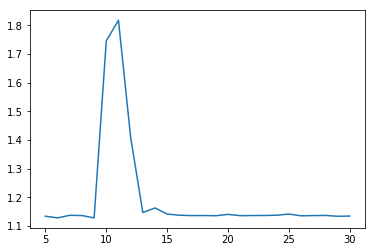

In [17]:
plt.plot(ratios['raw_truseq_weird'].index, ratios['raw_truseq_weird'].values)

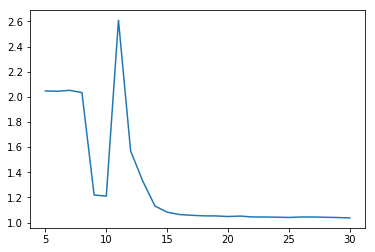

In [13]:
plt.plot(ratios['truseq_kmer_not_detected'].index, ratios['truseq_kmer_not_detected'].values)

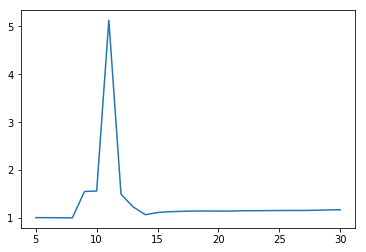

In [14]:
plt.plot(ratios['truseq_kmer_detected'].index, ratios['truseq_kmer_detected'].values)

In [25]:
histograms['raw_truseq_weird'][10]
# 10:        CTGTAGGCAC
# 11:        CTGTAGGCACC
#Illumina:   AGATCGGAAGAGC
#Small RNA:  TGGAATTCTCGG
#Nextera:    CTGTCTCTTATA
#AGATCGGAAGAGCACACGTCT

CTGTAGGCAC    16.9524
TGTAGGCACC     9.7078
TCTGTAGGCA     5.3376
CCTGTAGGCA     5.0915
ACTGTAGGCA     4.5734
GTAGGCACCA     4.5082
GCTGTAGGCA     4.3464
CTCTGTAGGC     1.7447
CCCTGTAGGC     1.7358
TAGGCACCAT     1.7018
TGCTGTAGGC     1.3124
AGCTGTAGGC     1.2404
GACTGTAGGC     1.1522
CTTCTGTAGG     1.0815
TTCTGTAGGC     1.0443
TCCTGTAGGC     1.0211
GGCTGTAGGC     1.0174
TCTGCTTGAA     0.9383
GCCTGTAGGC     0.9122
TACTGTAGGC     0.9053
AGGCACCATC     0.8680
CACTGTAGGC     0.8593
AACTGTAGGC     0.7816
GCCCTGTAGG     0.6607
ACCTGTAGGC     0.6029
CGCTGTAGGC     0.5944
ATCTGTAGGC     0.5868
GTCTGTAGGC     0.5458
GGCACCATCA     0.5255
ACACTGTAGG     0.5028
               ...   
CGTAGGGCCA     0.0001
GTCTTGGAGG     0.0001
CGTAGGGCGC     0.0001
GTCTTGAAGG     0.0001
CGTAGGTACA     0.0001
CGTAGGTACC     0.0001
CGTATCTGTA     0.0001
GTCTTCTGTA     0.0001
CGTATGCAGT     0.0001
GTCTTCTGGC     0.0001
CGTATGCCGG     0.0001
GTCTTAGACA     0.0001
CGTATGCGGT     0.0001
CGTATGCTCC     0.0001
CGTATGCTGT

In [18]:
ratios['raw_truseq_weird']

5     1.133455
6     1.127641
7     1.136707
8     1.135828
9     1.127519
10    1.746266
11    1.818127
12    1.409392
13    1.146468
14    1.162258
15    1.140987
16    1.136927
17    1.135629
18    1.135894
19    1.135178
20    1.139921
21    1.135388
22    1.135864
23    1.136040
24    1.136891
25    1.140992
26    1.134864
27    1.135690
28    1.136233
29    1.133185
30    1.134025
dtype: float64

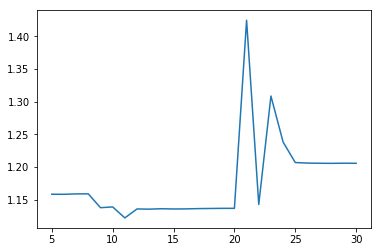

In [8]:
plt.plot(ratios['13nt'].index, ratios['13nt'].values)

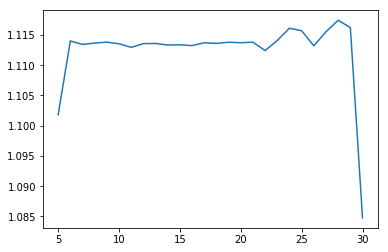

In [9]:
plt.plot(ratios['13nt_post_trimming'].index, ratios['13nt_post_trimming'].values)

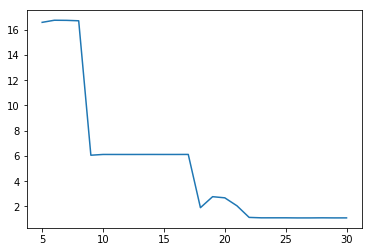

In [10]:
plt.plot(ratios['17nt_post_trimming'].index, ratios['17nt_post_trimming'].values)

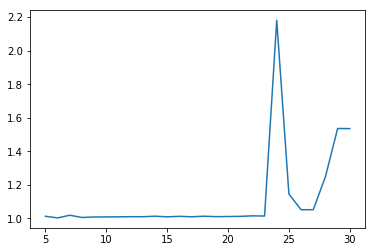

In [11]:
plt.plot(ratios['17nt'].index, ratios['17nt'].values)

# A Dataset with 17nt adapter

The adapter for this dataset is 17nt long: CTGTAGGCACCATCAAT
We will first consider looking at the raw fastq to see if we find any enriched sequences.


In [5]:
get_top_kmers(histograms['17nt'][17])
#AGATCGGAAGAGC
#CACCATCAATAGATCGG

CACCATCAATAGATCGG    13.1623
GCACCATCAATAGATCG    13.0374
AGGCACCATCAATAGAT    12.9194
GGCACCATCAATAGATC    12.8873
ACCATCAATAGATCGGA     7.7049
TAGGCACCATCAATAGA     6.1639
dtype: float64

There does seem to be enrichment of some 17nt sequences (collpasing them on Levenshtein distance will lead to one sequence being >50%)

In [6]:
get_top_kmers(histograms['17nt_post_trimming'][17])

CTGTAGGCACCATCAAT    55.4321
CTGTAGGCCCCATCAAT     9.0573
GACCCGGTGAGGCGGGG     3.8465
dtype: float64

This should also highlight the need to trim twice. Let's look at the original 17nt enrichment sequence (before anytrimming). The top sequence is:

CACCATCAATAGATCGG. Looking closely, it should not be difficult to realize that there is illumina standard adapter (`AGATCGGAAGAGC`) thrown somewhere in between.

CACCATCAAT**AGATCGG**. So trimming gets rid of these partial adapters and the rest of the overrepresented sequence shows enrichment, which is not so clear
without trimming.

To make sure 17nt indeed is the adapter, we can go one nucleotide up:


In [7]:
get_top_kmers(histograms['17nt_post_trimming'][18])

GCTGTAGGCACCATCAAT    22.4646
TCTGTAGGCACCATCAAT    11.7972
CCTGTAGGCACCATCAAT    11.4453
ACTGTAGGCACCATCAAT     9.7249
GCTGTAGGCCCCATCAAT     4.9783
TGACCCGGTGAGGCGGGG     3.8444
ACTGACCCGGTGAGGCGG     1.9585
TCTGTAGGCCCCATCAAT     1.4981
CCTGTAGGCCCCATCAAT     1.4754
dtype: float64

# Dataset with 13nt adapter

Let's try do do the same with a fastq where we know the adpter is 13 nt long.


In [8]:
get_top_kmers(histograms['13nt'][13])


AAGAGCACACGTC    16.1245
AGAGCACACGTCT    14.1972
GAGCACACGTCTG     9.9697
GAAGAGCACACGT     9.1139
AGCACACGTCTGA     8.7303
GGAAGAGCACACG     8.2685
dtype: float64

Again, the first four sequences are essentially within a Levenshtein distance of 1-2nt.


In [9]:
get_top_kmers(histograms['13nt'][14])


GAAGAGCACACGTC    16.1145
AAGAGCACACGTCT    14.1804
AGAGCACACGTCTG     9.9658
GGAAGAGCACACGT     9.1067
GAGCACACGTCTGA     8.7169
CGGAAGAGCACACG     8.2564
dtype: float64

In [10]:
get_top_kmers(histograms['13nt'][15])


GGAAGAGCACACGTC    16.1013
GAAGAGCACACGTCT    14.1736
AAGAGCACACGTCTG     9.9550
CGGAAGAGCACACGT     9.0890
AGAGCACACGTCTGA     8.7135
TCGGAAGAGCACACG     8.2518
dtype: float64

In [11]:
get_top_kmers(histograms['13nt'][17])


TCGGAAGAGCACACGTC    16.0734
CGGAAGAGCACACGTCT    14.1419
GGAAGAGCACACGTCTG     9.9349
ATCGGAAGAGCACACGT     9.0782
GAAGAGCACACGTCTGA     8.6985
GATCGGAAGAGCACACG     8.2462
dtype: float64

In [12]:
get_top_kmers(histograms['13nt'][20])


AGATCGGAAGAGCACACGTC    16.0616
GATCGGAAGAGCACACGTCT    14.1262
ATCGGAAGAGCACACGTCTG     9.9163
TCGGAAGAGCACACGTCTGA     8.6758
CGGAAGAGCACACGTCTGAA     4.6175
GGAAGAGCACACGTCTGAAC     4.1324
GAGATCGGAAGAGCACACGT     3.3973
AAGATCGGAAGAGCACACGT     2.2540
GAAGATCGGAAGAGCACACG     2.2406
TAGATCGGAAGAGCACACGT     2.1943
GAAGAGCACACGTCTGAACT     1.9141
dtype: float64

In [13]:
get_top_kmers(histograms['13nt'][21])


AGATCGGAAGAGCACACGTCT    14.1236
GATCGGAAGAGCACACGTCTG     9.9142
ATCGGAAGAGCACACGTCTGA     8.6733
AAGATCGGAAGAGCACACGTC     6.2070
TAGATCGGAAGAGCACACGTC     4.6852
TCGGAAGAGCACACGTCTGAA     4.6157
CGGAAGAGCACACGTCTGAAC     4.1277
GAGATCGGAAGAGCACACGTC     3.5576
GGAAGAGCACACGTCTGAACT     1.9112
GAAGATCGGAAGAGCACACGT     1.7736
CAGATCGGAAGAGCACACGTC     1.6118
ATTAGATCGGAAGAGCACACG     1.5639
TTAGATCGGAAGAGCACACGT     1.4197
GGAGATCGGAAGAGCACACGT     1.3926
GAAGAGCACACGTCTGAACTC     1.0232
CGAGATCGGAAGAGCACACGT     0.9139
TGAAAGATCGGAAGAGCACAC     0.8508
TGAAGATCGGAAGAGCACACG     0.8373
AGAGATCGGAAGAGCACACGT     0.7603
dtype: float64

Again, not sure where should we stop. Let's do this on the trimmed dataset

In [14]:
get_top_kmers(histograms['13nt_post_trimming'][5])[0:5]


GAGCG    7.8018
AGCGA    7.0808
GGCTT    5.6907
CTGGG    3.1384
TGGGG    2.9078
dtype: float64

It look's good now. This doesn't require a second pass at trimming!